# Search stocks

In [6]:
import sys
!{sys.executable} -m pip install pandas_datareader yfinance matplotlib

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621


In [7]:
import pandas as pd
from pandas import DataFrame
import json
from pandas_datareader import data as pdr
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
yf.pdr_override()


In [8]:
etfs = ["SPY", 
"GDX", 
"URTH", 
"ARKF", 
"ARKG", 
"ARKK", 
"ARKQ", 
"ARKW", 
"DBC", 
"GLD", 
"ICLN", 
"IVV", 
"QQQ", 
"TAN", 
"USO", 
"VOO", 
"VXX", 
"XLE", 
"XLK"]

ma_count = 21


data = pdr.get_data_yahoo(etfs, start=dt.datetime(2021,1,1), end=dt.date.today())['Close']
data.tail()


[*********************100%***********************]  19 of 19 completed


,ARKF,ARKG,ARKK,ARKQ,ARKW,DBC,GDX,GLD,ICLN,IVV,QQQ,SPY,TAN,URTH,USO,VOO,VXX,XLE,XLK
Date,,,,,,,,,,,,,,,,,,,
2022-07-06,16.500000,35.400002,43.959999,50.189999,52.849998,24.600000,26.790001,162.139999,18.959999,385.279999,288.799988,383.250000,71.059998,107.559998,73.669998,352.329987,22.160000,68.510002,130.119995
2022-07-07,17.350000,37.650002,46.830002,52.369999,55.889999,25.620001,27.160000,162.229996,19.740000,390.989990,294.980011,388.989990,75.019997,109.209999,76.550003,357.500000,22.330000,70.980003,132.809998
2022-07-08,17.280001,37.459999,46.860001,52.480000,56.040001,26.070000,27.059999,162.300003,19.990000,390.679993,295.350006,388.670013,76.680000,109.250000,78.540001,357.290009,21.990000,70.949997,132.869995
2022-07-11,16.190001,35.599998,43.619999,50.340000,52.029999,26.020000,26.650000,161.429993,19.450001,386.230011,289.040009,384.230011,73.050003,107.669998,78.230003,353.250000,22.209999,70.269997,131.039993
2022-07-12,16.290001,36.470001,44.320000,49.980000,51.880001,24.840000,26.260000,160.830002,19.100000,382.760010,286.239990,380.829987,70.610001,107.120003,72.809998,349.989990,22.480000,68.900002,129.250000


In [9]:
ma = data.rolling(window=ma_count).mean()
ma_pers = data.div(ma).mul(100).sub(100)
#ma_pers.iloc[[-1]]
ma_pers_r=ma_pers.iloc[::-1]
d = {}
df_prep = []
for col_name in ma_pers_r.columns:
    d[col_name]=0
    ma_last = None
    for index, row in ma_pers_r.iterrows():
        if row[col_name] > 0:
            d[col_name] += 1
            if ma_last == None:
                ma_last=row[col_name]
        else:
            if d[col_name] != 0:
               df_prep.append([col_name, d[col_name], ma_last, ma_count, "daily"]) 
            break
df = DataFrame(df_prep,columns=['name','count', 'ma_diff', 'ma_size', 'ma_type']).sort_values(by=['ma_diff', 'count'], ascending=False)
print(df['count'][df['count'] >= 5].size)
lead_comps_df = df[df['count'] >= 5]
lead_comps = lead_comps_df['name'].values.tolist()
lead_comps_df

4


,name,count,ma_diff,ma_size,ma_type
0,ARKG,14,12.457606,21,daily
1,ARKK,6,5.704777,21,daily
5,QQQ,5,0.623048,21,daily
2,ARKW,6,0.438825,21,daily


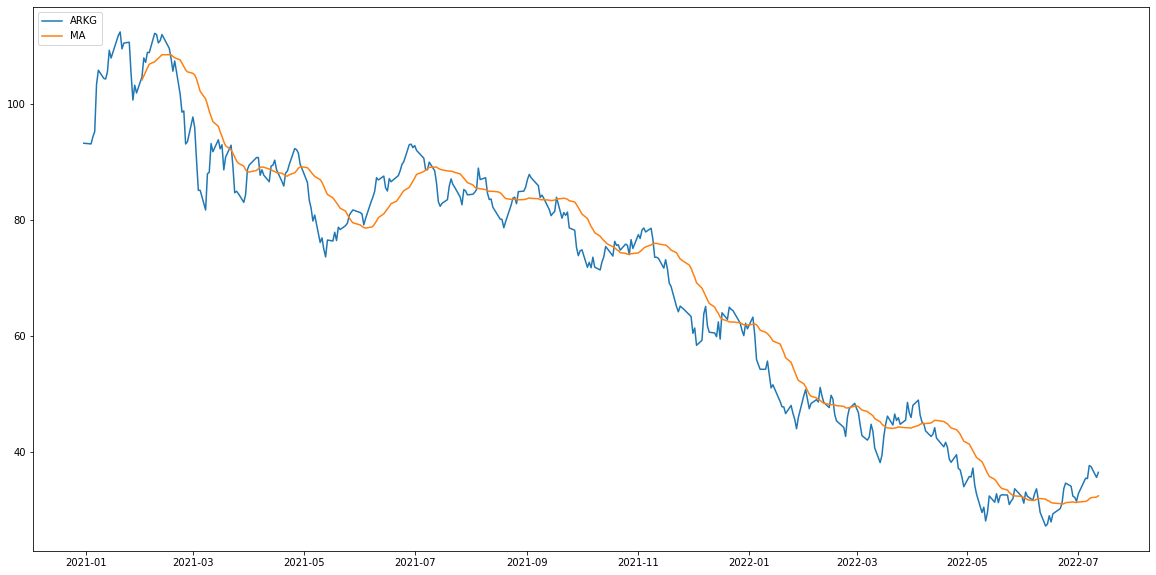

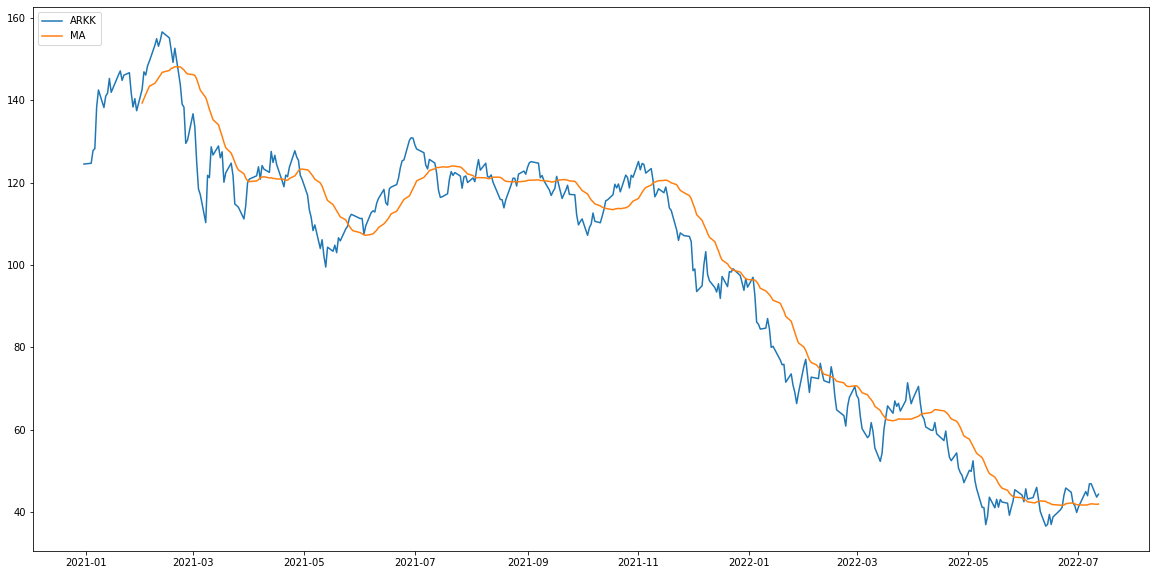

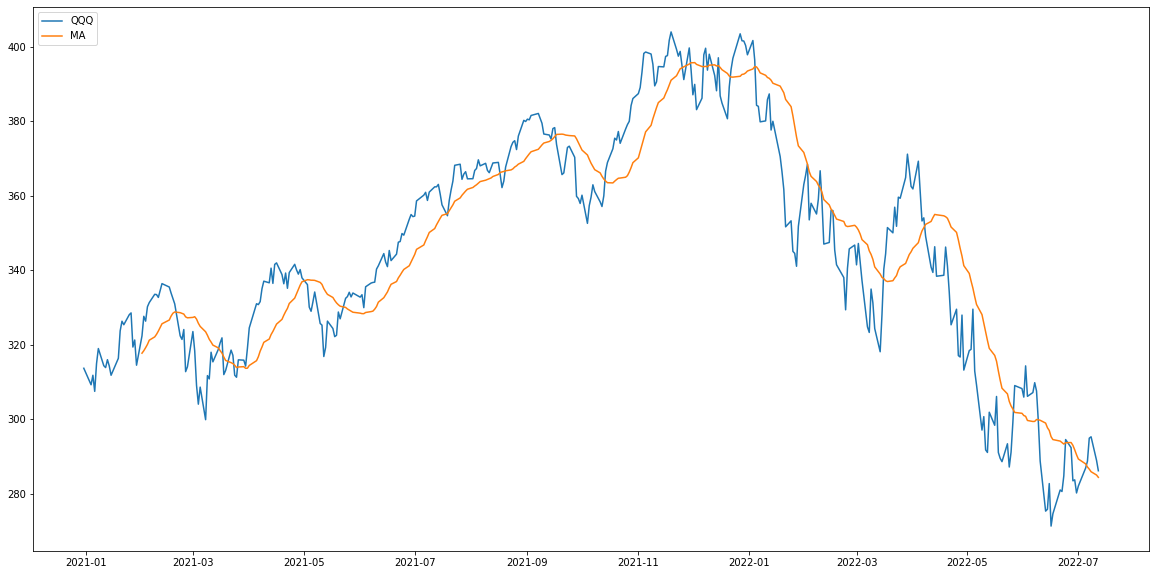

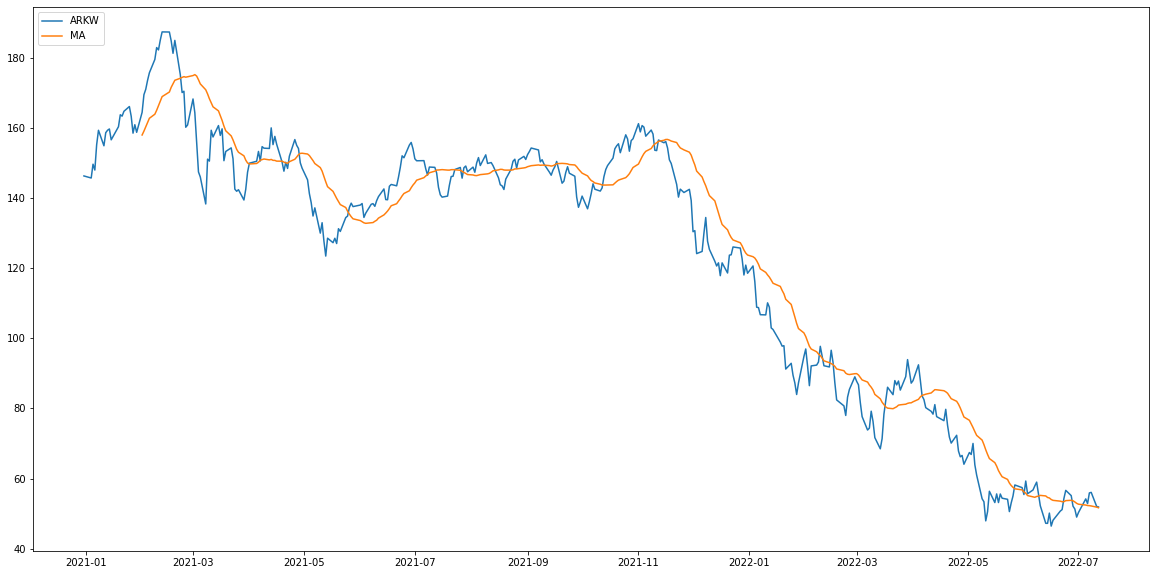

In [10]:
for quote in lead_comps:
    fig, ax = plt.subplots(figsize=(20, 10))
    plt.plot(data[quote], label=quote);
    plt.plot(ma[quote], label = 'MA');
    plt.legend(loc=2);